<a href="https://colab.research.google.com/github/ttogle918/ds-section1-sprint3/blob/master/n132-intermediate-linear-algebra/n132a-intermediate-linear-algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment


## 1. 주어진 리스트에 대해서 평균, 분산, 표준편차를 구하는 함수를 작성해보세요. (`mean`같은 builtin function 제외)
> [243, 278, 184, 249, 207] 에 대해서 해당 함수를 사용한 결과가 아래와 같으면 정답입니다. (소수점 두자리까지만 보여드립니다)
- mean : 232.2
- var : 1090.96
- std : 33.03

In [ ]:
def mymean(v):
  if len(v) == 0 :
    return 0
  return sum(v) / len(v)

def myvar(v):
  if len(v) == 0 :
    return 0
  v_sum = 0
  for val in v :
    v_sum = v_sum + (val - mymean(v))**2
  return v_sum / len(v)

def mystd(v):
  return np.sqrt(myvar(v))

def myvar2(v): #표본분산
  if len(v) == 0 :
    return 0
  v_sum = 0
  for val in v :
    v_sum = v_sum + (val - mymean(v))**2
  return v_sum / (len(v)-1)

def mystd2(v):
  return np.sqrt(myvar2(v))

In [ ]:
import numpy as np
v = np.array([243, 278, 184, 249, 207])
mymean(v)

232.2

In [ ]:
myvar(v)

1090.96

In [ ]:
mystd(v)

33.02968361943541

## 2. 위에서 사용된 데이터와 다음 데이터의 공분산과, 상관계수를 구해보세요
> [88, 89, 83, 112, 104] 에 대해서 해당 함수를 사용한 결과가 아래와 같으면 정답입니다. (소수점 두자리까지만 보여드립니다) 
- cov : 1363.7
- cor : 0.16



```
w = np.array([88, 89, 83, 112, 104])

res4 = np.cov(v, w)[0,1]
res5 = np.corrcoef(v, w)[0,1]
```



In [ ]:
def mycov(x, y) :
  mx = x - mymean(x)
  my = y - mymean(y)

  return sum(mx * my) / (len(x)-1)

def mycor(x,y) :  # 표본이라고 가정
  return mycov(x, y) / ( mystd2(x) * mystd2(y) )

In [ ]:
np.array([1, 1, 1]) * np.array([1, 2, 3]) - 1

array([0, 1, 2])

In [ ]:
y = np.array([88, 89, 83, 112, 104])
res4 = mycov(v, y)
print( res4.round(2) )
print(np.cov(v, y))

71.7
[[1363.7   71.7]
 [  71.7  149.7]]


In [ ]:
# 이곳에 답안을 작성하시기 바랍니다
res5 = mycor(v, y)
print( res5.round(2) )
print(np.corrcoef(v, y))

0.16
[[1.         0.15868974]
 [0.15868974 1.        ]]


## 3. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요. 

\begin{align}
g = \begin{bmatrix} 1 & 3 \end{bmatrix}
\qquad
h = \begin{bmatrix} 2 & 6 \end{bmatrix}
\end{align}

In [ ]:
# 이곳에 답안을 작성하시기 바랍니다
g = np.array([1, 3])
h = np.array([2, 6])

In [ ]:
n = h[0] / g[0]
if np.array_equal(h / n, g) :
  res6 = len(g)-1
else :
  res6 = len(g)

In [ ]:
res6


1

위에 예시처럼 두 벡터가 있다면 최대 2차원을 가진다.

하지만 두 벡터는 크기(길이)만 다를 뿐, 같은 방향으로 가는 벡터이기 때문에 같은 벡터라고 봐도 무방하다.

따라서 해당 차원은 1차원을 가진다. ( =span은 1이다 )

## 4. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요.

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}



```
g = np.array([1, 3])
h = np.array([2, 6])

gh_matrix = np.stack((g, h))

res6 = np.linalg.matrix_rank(gh_matrix)
```



In [ ]:
# 이곳에 답안을 작성하시기 바랍니다
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

In [ ]:
def isEqualD(v1, v2) :
  length = len(v1)
  n = v1[0] / v2[0]
  if np.array_equal(v1 / n, v2) :
    return True
  return False

In [ ]:
vec = np.array([l, m, n])
res7 = len((vec))
vec[0]

array([1, 2, 3])

In [ ]:
vec = np.array([l, m, n])
res7 = len((vec))

for n in range(0, len(vec)-1) :
  for m in range(n+1, len(vec)) :
    # print(vec[n], vec[m])
    if isEqualD(vec[int(n)], vec[int(m)]) == True :
      res7 = res7 - 1

res7

3

"'int' object is not subscriptable"가 발생했는데, 실제 값을 찍어보니 벡터가 아니라 스칼라값이 들어있었다.

그 원인은 원본값(l,m,n)이 밑에 함수를 여러번 실행하다보니 변경(손상?) 되어있던 것!

python은 view형식이다.. copy가 아니다..! 대입할 때 주의

## 5. 다음 매트릭스의 rank를 구하세요

\begin{align}
P = \begin{bmatrix} 
0 & 2 & 5 \\
 3 & 6 & 12 \\
3 & 2 & 2
\end{bmatrix}
\end{align}



```
mat_p = np.array([[0, 2, 5], [3, 6, 12], [3, 2, 2]])

res8 = np.linalg.matrix_rank(mat_p)
```



In [ ]:
p = np.array([[0, 2, 5], [3, 6, 12], [3, 2, 2]])

In [ ]:
np.linalg.matrix_rank(p)

2

# 🔥 도전과제 

주어진 데이터 (x, y)에 대해서 `y = x` 라는 벡터에 대해 projection을 계산하는 함수를 작성하세요. 
- (x, y) 는 (0, 0) 에서 (x, y)로 가는 벡터라 가정합니다.

이후

- 입력된 데이터를 파란색 선으로, 
- `y = x` 라는 벡터를 빨간색 선으로, 마지막으로 
- projection 된 선을 녹색 점선(dashed)으로 그래프에 그리세요.

In [ ]:
v = [7, 4]

def myProjection(v):
  v = np.array(v)
  w = np.array([15, 15])
  v_proj = (np.dot(v,w) / np.dot(w,w)) * w
  return v_proj

vprime = myProjection(v)

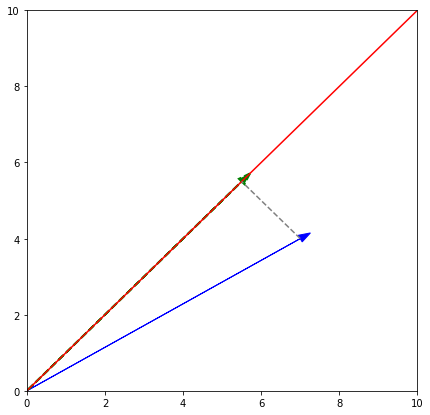

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 20)
y = x*1

plt.figure(figsize = (7, 7))

plt.xlim((0,10))
plt.ylim((0,10))
plt.arrow(0,0,7,4, color='blue', head_width=0.2)
plt.plot(x,y, color='red')
plt.arrow(0, 0, vprime[0], vprime[1], color = 'green', linestyle = '--', head_width = 0.2, linewidth = 2)
plt.plot([7, vprime[0]], [4, vprime[1]], color = 'gray', linestyle = '--')

plt.show()